In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
# load predicted values from the previous 6-fold cross-validation as df
fps_xgboost_d_1 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_d_fold_1.csv')
fps_xgboost_d_2 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_d_fold_2.csv')
fps_xgboost_d_3 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_d_fold_3.csv')
fps_xgboost_d_4 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_d_fold_4.csv')
fps_xgboost_d_5 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_d_fold_5.csv')
fps_xgboost_d_6 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_d_fold_6.csv')
# concat the data, rename columns (actual=experimentally determined value)
fps_xgboost = pd.concat((fps_xgboost_d_1, fps_xgboost_d_2, fps_xgboost_d_3, fps_xgboost_d_4, fps_xgboost_d_5, fps_xgboost_d_6),axis=0)
fps_xgboost = fps_xgboost.rename({'3': 'SMILES', '4':'Mol_No', '5': 'actual', '6':'predict'}, axis='columns')

In [3]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(fps_xgboost['actual'], fps_xgboost['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(fps_xgboost['actual'], fps_xgboost['predict'])))

# R^2 Coefficient of Determination
print(r2_score(fps_xgboost['actual'], fps_xgboost['predict']))

0.673601591293322
0.9485077709155355
0.7207369566534834


In [4]:
len(fps_xgboost)

1183

In [5]:
# calculate the residual value for each molecule
fps_xgboost['residual']= fps_xgboost['predict']-fps_xgboost['actual']

In [6]:
# calculate standardised deviation of the residuals (sdr) of the dataset
# equations used: sdr = sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((fps_xgboost['residual']**2).sum()/(len(fps_xgboost)-2))
sdr

0.9493105706960792

In [7]:
# calculate how many sdr each molecule's predicted value is away from the exp value 
fps_xgboost['std_residual'] = fps_xgboost['residual']/sdr
fps_xgboost['std_residual']

0      0.799165
1     -0.476592
2     -0.149621
3      0.536410
4     -0.913922
         ...   
192   -0.808406
193    0.001193
194   -0.378879
195    0.423321
196    0.126512
Name: std_residual, Length: 1183, dtype: float64

In [41]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
fps_xgboost_outliers = fps_xgboost.loc[abs(fps_xgboost['std_residual']) > n]
fps_xgboost_outliers

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
72,72,415,415,415,FC(F)(F)Br,415,14.3,17.881440,3.581440,3.772675
96,96,557,557,557,CCOC(=O)CCCC(=O)OCC,557,16.3,12.389435,-3.910565,-4.119374
122,122,723,724,723,C=O,723,12.8,15.971532,3.171532,3.340879
136,136,809,811,809,CN(C)CCOC(=O)COc1ccc(Cl)cc1,809,16.0,19.626970,3.626970,3.820636
3,3,12,12,12,CC(Br)Br,12,18.5,15.310307,-3.189693,-3.360010
64,64,367,367,367,N,367,13.7,16.582228,2.882228,3.036128
134,134,767,769,767,IC(=C)C=C,767,19.9,16.946806,-2.953194,-3.110883
167,167,964,966,964,[O-][O+]=O,964,19.8,16.889740,-2.910260,-3.065656
32,32,196,196,196,OC(=O)C(Cl)=C,196,19.1,16.077759,-3.022241,-3.183617
70,70,404,404,404,NC(=O)NC(N)=O,404,20.0,16.650980,-3.349020,-3.527844


In [42]:
# Set the default text font size
plt.rc('font', size=22)

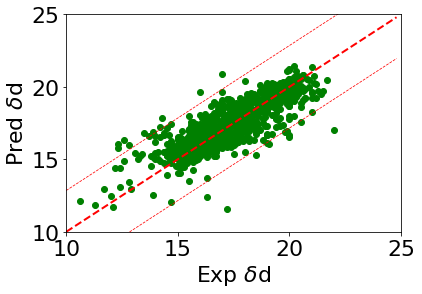

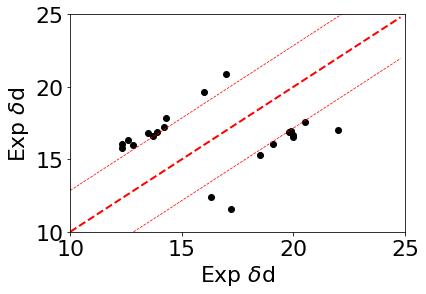

In [48]:
# plot two figures
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 3 srd (n=3) away from the ideal agreement. 
ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost['actual'], y=fps_xgboost['predict'], color='green')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 3 srd
ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost_outliers['actual'], y=fps_xgboost_outliers['predict'], color='black')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Exp $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

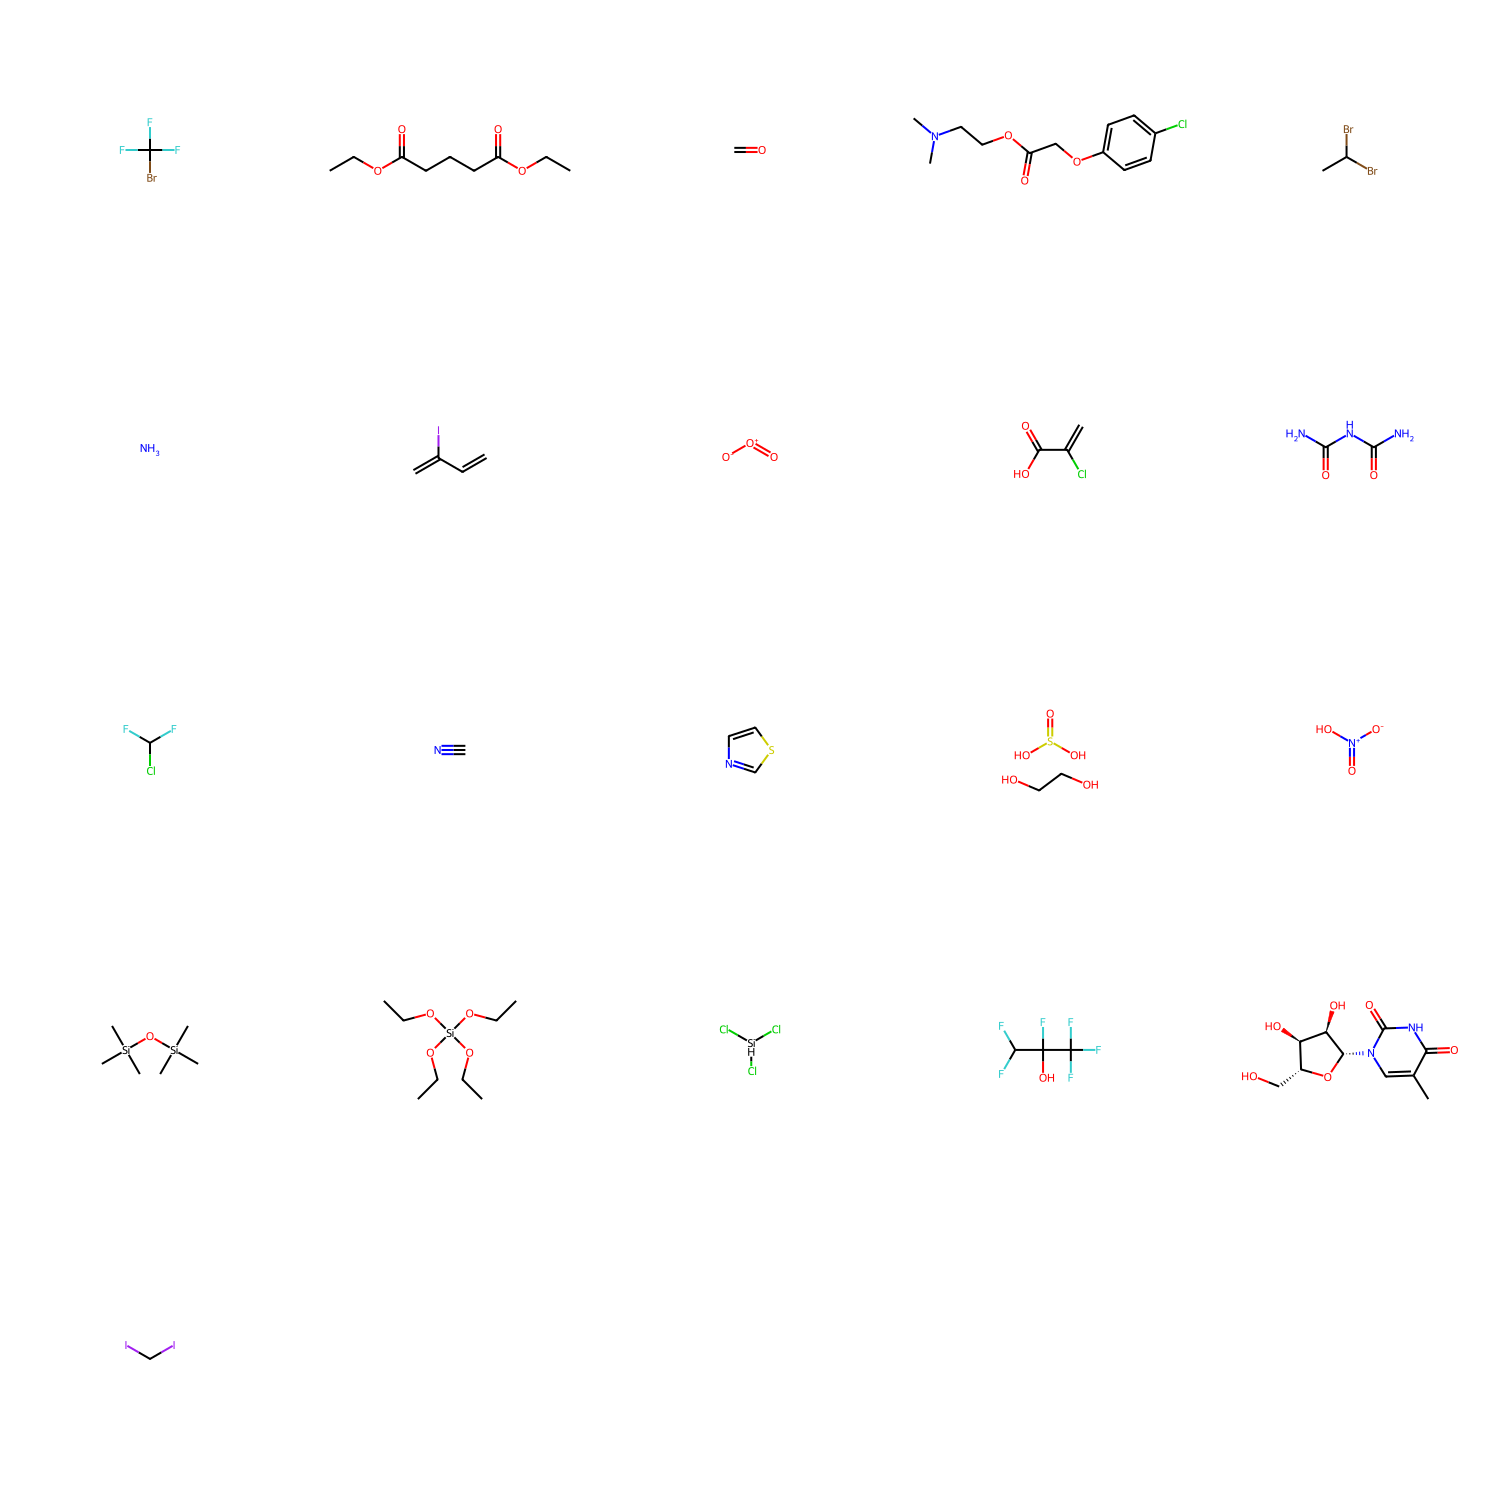

In [49]:
# draw n=3 outlier structure
outliners = [Chem.MolFromSmiles(x) for x in fps_xgboost_outliers['SMILES']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [50]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
fps_xgboost_outliers2 = fps_xgboost.loc[abs(fps_xgboost['std_residual']) > n]
len(fps_xgboost_outliers2)

68

In [51]:
fps_xgboost_outliers2

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
62,62,361,361,361,C=CCN=C=S,361,17.0,19.120780,2.120780,2.234021
72,72,415,415,415,FC(F)(F)Br,415,14.3,17.881440,3.581440,3.772675
96,96,557,557,557,CCOC(=O)CCCC(=O)OCC,557,16.3,12.389435,-3.910565,-4.119374
121,121,721,722,721,CF,721,13.4,15.394183,1.994183,2.100664
122,122,723,724,723,C=O,723,12.8,15.971532,3.171532,3.340879
...,...,...,...,...,...,...,...,...,...,...
120,120,769,771,769,IC(=C)C=C,769,17.2,19.152853,1.952853,2.057128
139,139,863,865,863,CC1=CN([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)C(=O)...,863,17.0,20.896440,3.896440,4.104494
142,142,878,880,878,ICI,878,22.0,17.053907,-4.946093,-5.210195
150,150,935,937,935,CCCCCCCCCc1ccccc1O,935,16.5,18.689426,2.189426,2.306333


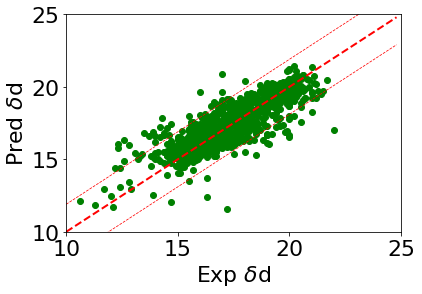

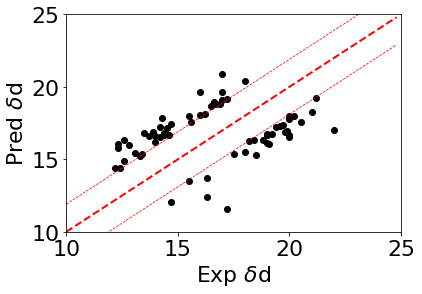

In [54]:
# plot two figures
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 2 srd (n=2) away from the ideal agreement. 
ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost['actual'], y=fps_xgboost['predict'], color='green')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 2 srd
ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost_outliers2['actual'], y=fps_xgboost_outliers2['predict'], color='black')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

/opt/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


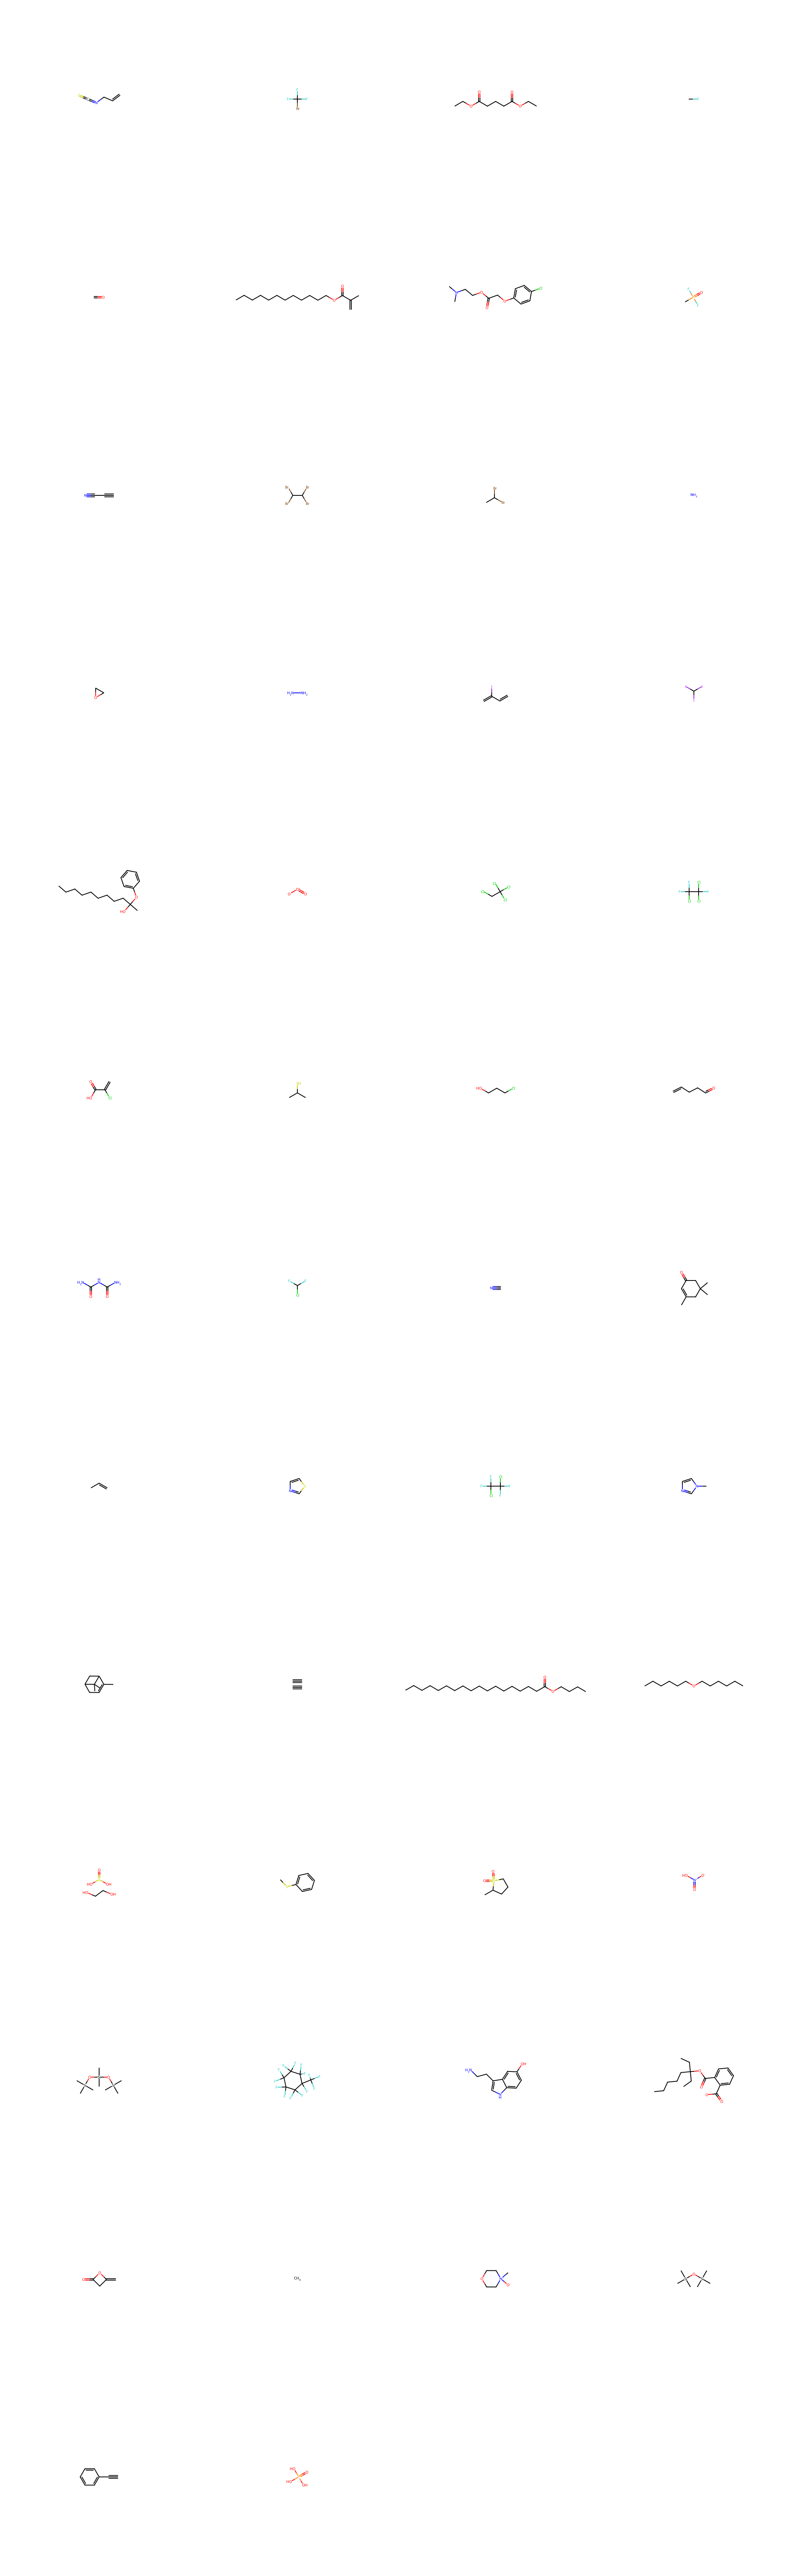

In [22]:
# draw n=2 outlier structure
outliners2 = [Chem.MolFromSmiles(x) for x in fps_xgboost_outliers2['SMILES']]
Draw.MolsToGridImage(outliners2, subImgSize=(500,500), molsPerRow=4)

In [24]:
# save outliers (n=2) info to a csv file
fps_xgboost_outliers2.to_csv('fps_xgboost_d_outliers2.csv')

In [25]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in fps_xgboost_outliers2['SMILES']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

131.2953603288794
139.1277407562634


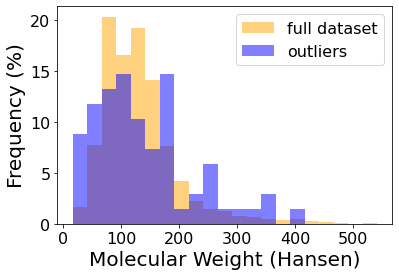

In [26]:
# plot molecular weight distribution for the full dataset and the outliers
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])

ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (Hansen)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()